## Basic clustering models

#### [Artificial intelligence on the world stage: dominant players and their future competitors](https://intersog.com/blog/ai-dominant-players-and-aspiring-challengers/)    
  
**The Global Artificial Intelligence Index (GAII)** is an index created by Tortoise Media to rank countries based on their AI potential, including by measuring levels of investment, innovation, and adoption.  
The dataset contains seven indicators that make up the GAII for 61 countries, as well as general country information (region, income group, and political regime).  
### Description of the dataset 
- Country - name of the country  
- Talent - indicator characterising the availability of skilled practitioners in the field of artificial intelligence  
- Infrastructure - the infrastructure indicator focuses on the reliability and scalability of infrastructure (from electricity and internet to supercomputers)  
- Operating Environment - the indicator focuses on the regulatory context and public opinion on AI - Research - the indicator focuses on the extent of specialised AI research  
- Development - the indicator focuses on the development of fundamental platforms and algorithms on which innovative AI projects are based  
- Government Strategy - the indicator characterises the degree of commitment of the national government to artificial intelligence  
- Commercial - the indicator focuses on the level of startup activity, investments, and business initiatives based on artificial intelligence  
- Region, Income group, Political regime

In [1]:
# import the necessary libraries
%pip install seaborn
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# graphs are embedded in notepad 
%matplotlib inline

# disable Anaconda warnings
import warnings
warnings.simplefilter('ignore')

### Let's look at the dataset


In [2]:
# Read the file with the initial data into the AI_index dataframe
AI = pd.read_csv('AI_index.csv')
AI.head() 

,Unnamed: 0,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Region,Income group,Political regime
0,0,United States of America,50.00,94.02,64.56,70.00,75.00,77.39,50.00,Americas,High,Liberal democracy
1,1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,Asia-Pacific,Upper middle,Closed autocracy
2,2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,Europe,High,Liberal democracy
3,3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,Americas,High,Liberal democracy
4,4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,Middle East,High,Liberal democracy


In [3]:
# Let's use .info ()
AI.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             61 non-null     int64  
 1   Country                61 non-null     object 
 2   Talent                 61 non-null     float64
 3   Infrastructure         61 non-null     float64
 4   Operating Environment  61 non-null     float64
 5   Research               61 non-null     float64
 6   Development            61 non-null     float64
 7   Government Strategy    61 non-null     float64
 8   Commercial             61 non-null     float64
 9   Region                 61 non-null     object 
 10  Income group           61 non-null     object 
 11  Political regime       61 non-null     object 
dtypes: float64(7), int64(1), object(4)
memory usage: 4.8+ KB


We can see that there are no missing values. There are 8 numeric variables and 4 categorical variables. 

### 1. Conduct exploratory and visual data analysis.

The following steps will be taken to conduct reconnaissance and visual analysis: 
1. Delete unnecessary columns.
2. Analyse for outliers in the data and remove them if necessary.
3. Find correlations between columns and build a heat map of correlations.
4. We'll split several columns.
5. Perform grouping.
6. Visualise the interdependence of some variables.

In [4]:
# 1.Let's delete the first column, as it simply duplicates the indices:
AI.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
# 2. Analyse the presence of outliers in the data. Let's use describe.
AI.describe ()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,16.054590,63.518689,67.156230,16.157541,14.338525,57.332295,5.430820
std,11.724953,20.384961,20.083022,15.479252,17.950746,26.129427,9.190023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.280000,55.760000,58.400000,2.970000,1.090000,40.350000,0.670000
50%,13.460000,65.360000,70.150000,12.230000,8.920000,63.580000,2.640000
75%,24.990000,76.200000,80.660000,25.480000,19.990000,77.390000,5.310000
max,50.000000,100.000000,100.000000,71.420000,79.970000,100.000000,50.000000


At first glance, there are no emissions. However, let's try to analyse the data better using a box plot.

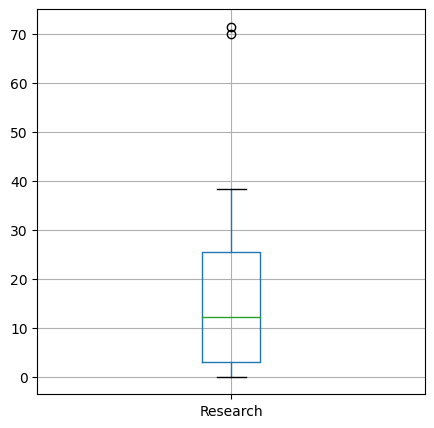

In [6]:
#Build a Research boxplot for better analysis of atypical data:
AI[['Research']].boxplot(figsize=(5, 5));

We can see that there are two exceptions, so let's try to review them.

In [7]:
# Filtering strings by realSum > 800
filtered_AI = AI[AI['Research'] > 60]

# Displaying the results
filtered_AI.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Region,Income group,Political regime
0,United States of America,50.00,94.02,64.56,70.00,75.00,77.39,50.00,Americas,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,Asia-Pacific,Upper middle,Closed autocracy


We can see that such a large indicator of AI research is in two countries: The United States and China. The data is consistent with the military, because these are the leading countries in the field of AI. Therefore, we conclude that there are no emissions.

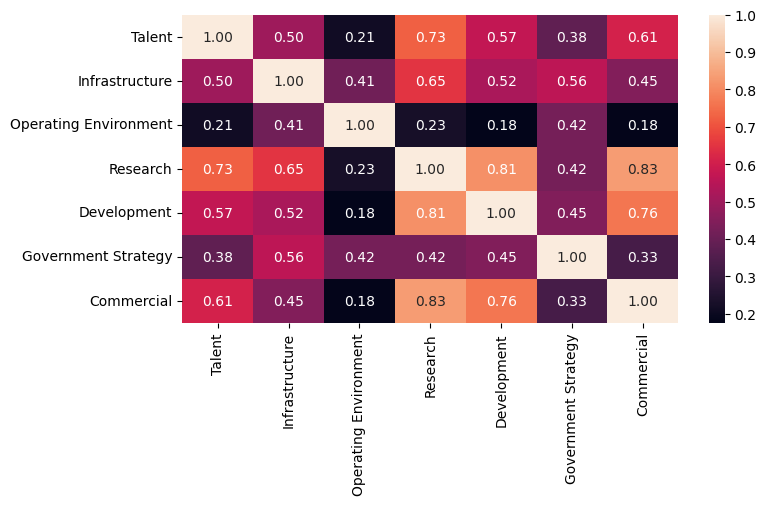

In [8]:
# 3. Find the correlations between the columns and build a heatmap of the correlations.

# Creating a correlation matrix
corr_matrix = AI.corr()

# Displaying the correlation matrix
plt.figure(figsize=(8, 4 ))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

As we can see, the highest positive linear correlation is between Research and Commercial and is 0.83. There are no negative correlations. They are quite well correlated: Development and Commercial (0.76), Research and Development (0.81), Talent and Research (0.73).

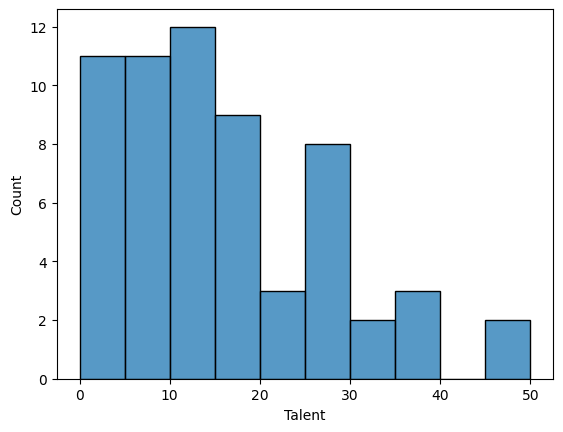

In [9]:
# 4. Let's split several columns.
# Column Talent
sns.histplot(AI['Talent'], bins=10)
plt.show()

As we can see, most countries have a skilled workforce level of up to 20. However, there is a share of countries that have skilled workers at the level of 25 to 30. There are also countries where the level reaches 50. 

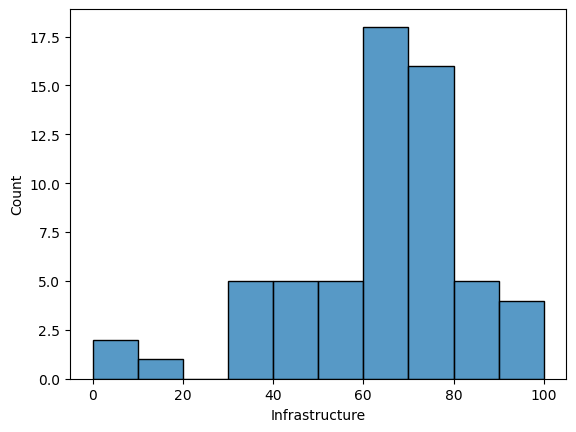

In [10]:
# Column Infrastructure
sns.histplot(AI['Infrastructure'], bins=10)
plt.show()

Thus, most countries have an infrastructure level of 60 to 80. However, there are a number of countries that have not reached even 20. 

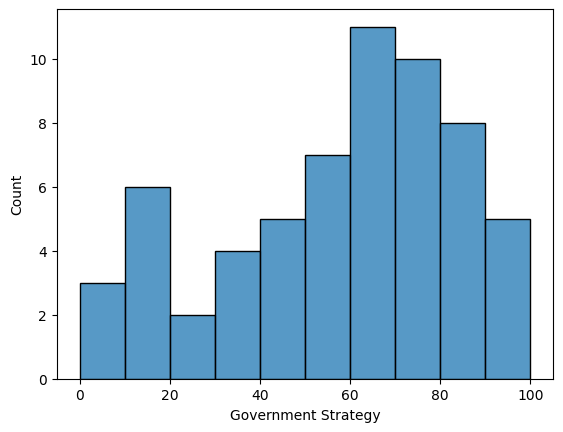

In [11]:
# Column Government Strategy
sns.histplot(AI['Government Strategy'], bins=10)
plt.show()

Analysing the level of national government commitment to artificial intelligence, we see that the vast majority of countries have a positive attitude to artificial intelligence and are trying to develop it. The largest number of countries is between 60 and 70.

In [12]:
# 5. Let's do the grouping.

# Let's group countries by region using groupby:
AI.groupby('Region')[['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', 'Government Strategy', 'Commercial', ]].mean()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial
Region,,,,,,,
Africa,4.080000,28.662000,52.172000,1.342000,4.356000,8.716000,0.584000
Americas,15.958750,63.402500,74.268750,14.635000,14.415000,66.371250,8.905000
Asia-Pacific,17.576429,64.113571,58.318571,20.723571,23.397857,59.850714,7.032143
Europe,19.149643,69.349286,73.107857,17.991071,12.520357,62.427143,4.387143
Middle East,8.166667,64.123333,63.006667,11.323333,9.901667,56.141667,5.971667


So, we can see that we have 5 regions in total. Let's analyse each of the indicators:
1. Talent - Europe has the most talent (19.15), while Africa has the least (4).
2. Infrastructure - Europe has the highest average infrastructure (69.3), while Africa has the lowest (28.66).
3. Operating Environment - the best attitude to the ST is in America (74.2), the worst in Africa (52.2).
4. Research - the largest number of studies on STs is in the Asia-Pacific region (20.7), the smallest in Africa (1.3).
5. Development - the situation is similar to Research: Asia-Pacific (23.4), Africa (4.4).
6. Government Strategy - the best government attitude towards ST is in the Americas (66.4), the worst in Africa (8.7).
7. Commercial - the level of startups is the best in America (8.9). The worst is in Africa (0.6).

Conclusion: Africa is the worst region. Asia Pacific has the most research, the best attitude in America, and the best conditions in Europe. 

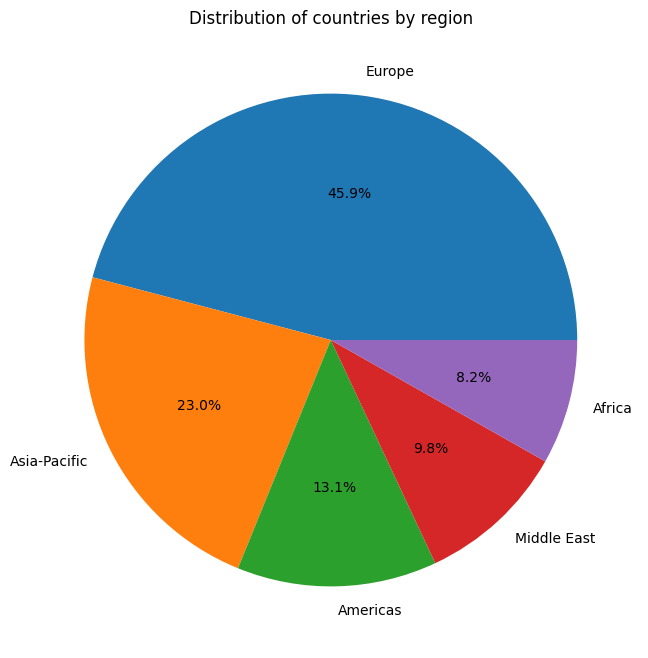

In [13]:
# 6. Visualise the most correlated variables.

#Let's create a pie chart of regions:
region_counts = AI['Region'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Distribution of countries by region')
plt.show()

We see that the vast majority of countries are from Europe (45.9%), followed by Asia-Pacific (23%), and the smallest number from Africa (8.2%). 

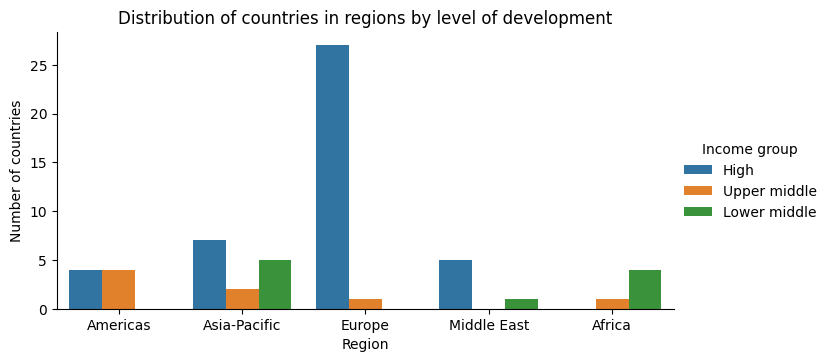

In [14]:
# Let's analyse the level of development of countries in each region:
sns.catplot(data=AI, x='Region', hue='Income group', kind='count', height=3.5, aspect=2);
plt.xlabel('Region')
plt.ylabel('Number of countries')
plt.title('Distribution of countries in regions by level of development')
plt.show()

As we can see, the largest number of developed countries is in Europe (27), followed by Asia and the Pacific (7). At the same time, the Asia-Pacific region has the largest number of low-income countries (5), followed by Africa (4).

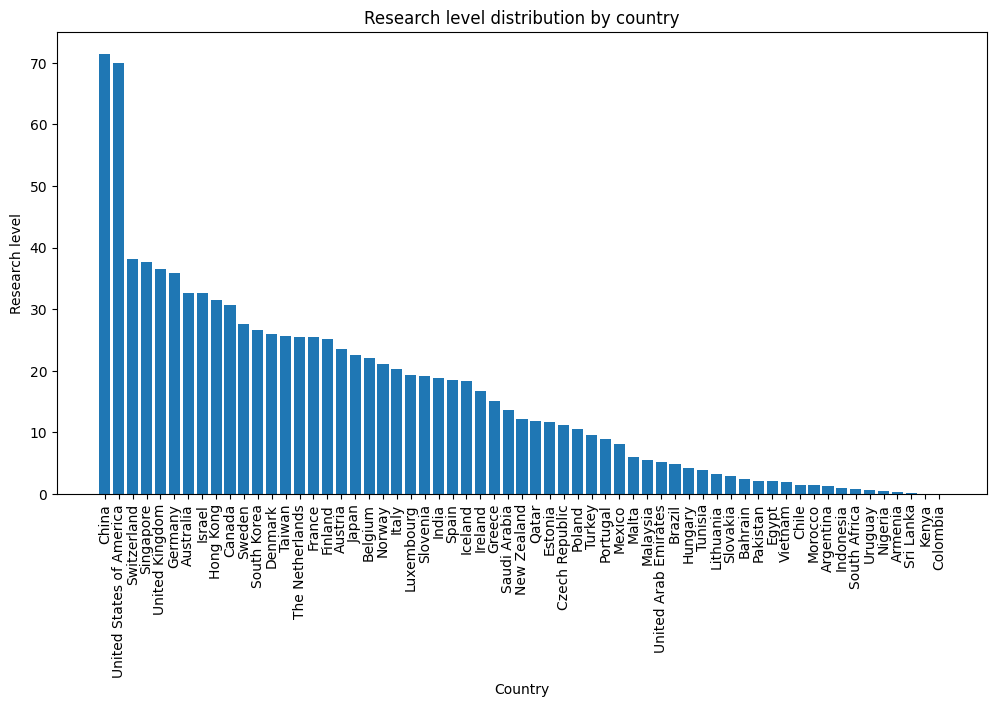

In [15]:
# Let's try to find out which countries have the highest level of AI research

#Let's sort the data by the level of AI research in the country:
AI_sort = AI.sort_values('Research', ascending=0)

#Graph of Research by country:
plt.figure(figsize=(12, 6))
plt.bar(AI_sort['Country'], AI_sort['Research'])
plt.xlabel('Country')
plt.ylabel('Research level')
plt.title('Research level distribution by country')
plt.xticks(rotation=90)
plt.show()

As you can see, China and the United States are in the lead, with a research level of 70. This is followed by Switzerland, Singapore and the UK (less than 40). There are no studies in Colombia and Kenya (0).

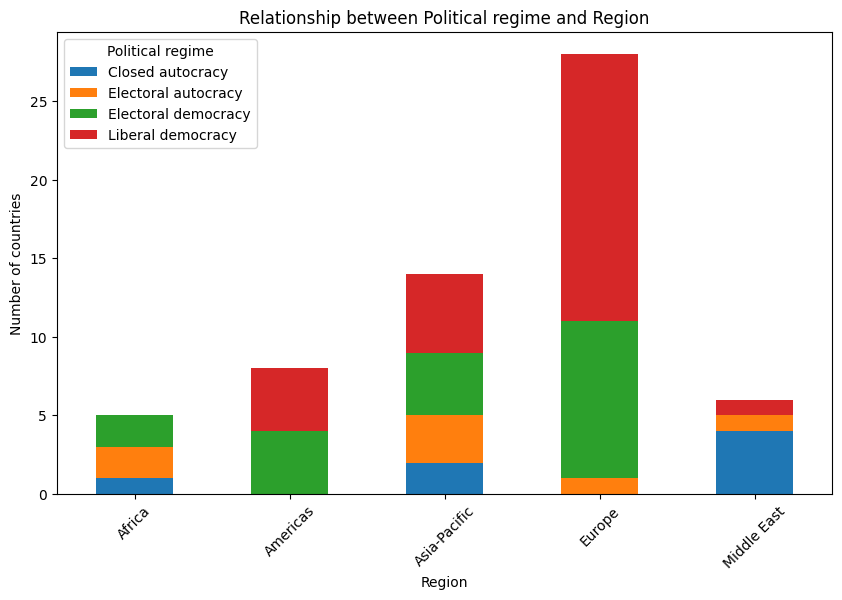

In [16]:
# Let's analyse the political regimes in each region:
region_political_counts = AI.groupby(['Region', 'Political regime']).size().unstack()
region_political_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Number of countries')
plt.title('Relationship between Political regime and Region')
plt.xticks(rotation=45)
plt.legend(title='Political regime')
plt.show()

We see that all liberal countries are in Europe (most of all), America, and the Asia-Pacific region. The situation with representative democracy is similar. As for autocracy, countries with this regime prevail in Africa and the Asia-Pacific region. Closed autocracies are mostly prevalent in the Middle East. 

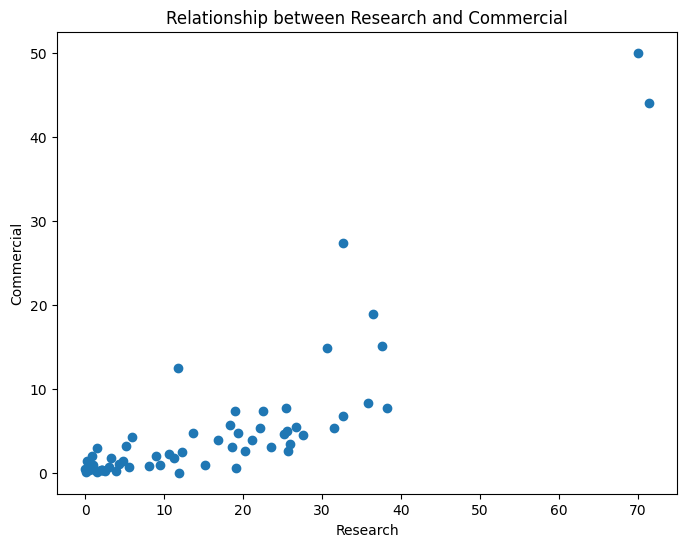

In [17]:
# Visualise the relationship between Research and Commercial:
plt.figure(figsize=(8, 6))
plt.scatter(AI_sort['Research'], AI_sort['Commercial'])
plt.xlabel('Research')
plt.ylabel('Commercial')
plt.title('Relationship between Research and Commercial')
plt.show()

We can see that the variables are correlated: when one indicator increases, the other one follows. We can see that two cases with the highest scores stand out quite strongly, I dare say that these are the United States and China, which are leading in the study of artificial intelligence. 

### Let's prepare the initial data:

In [18]:
# To begin with, let's set the country names as indexes
AI.set_index(['Country'], inplace=True)
AI.head()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Region,Income group,Political regime
Country,,,,,,,,,,
United States of America,50.00,94.02,64.56,70.00,75.00,77.39,50.00,Americas,High,Liberal democracy
China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,Asia-Pacific,Upper middle,Closed autocracy
United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,Europe,High,Liberal democracy
Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,Americas,High,Liberal democracy
Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,Middle East,High,Liberal democracy


In [19]:
# Remove the last three columns for further cluster analysis
columns_to_drop = ['Region', 'Income group', 'Political regime']
AI.drop(columns_to_drop, axis=1, inplace=True)
AI.head()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial
Country,,,,,,,
United States of America,50.00,94.02,64.56,70.00,75.00,77.39,50.00
China,16.51,100.00,91.57,71.42,79.97,94.87,44.02
United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91
Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88
Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33


In [20]:
# Standardise the data: 
# import the required library
from sklearn.preprocessing import StandardScaler

# select the desired standardisation method
scaler = StandardScaler()
scaler.fit(AI)
X_stand = scaler.fit_transform(AI)

### 2. Perform hierarchical cluster analysis, making assumptions about the possible number of clusters.

In [21]:
#Data preparation.
#Data to be used for clustering:
samples = X_stand
#samples of the horizontal axis:
names = np.array(AI.index)

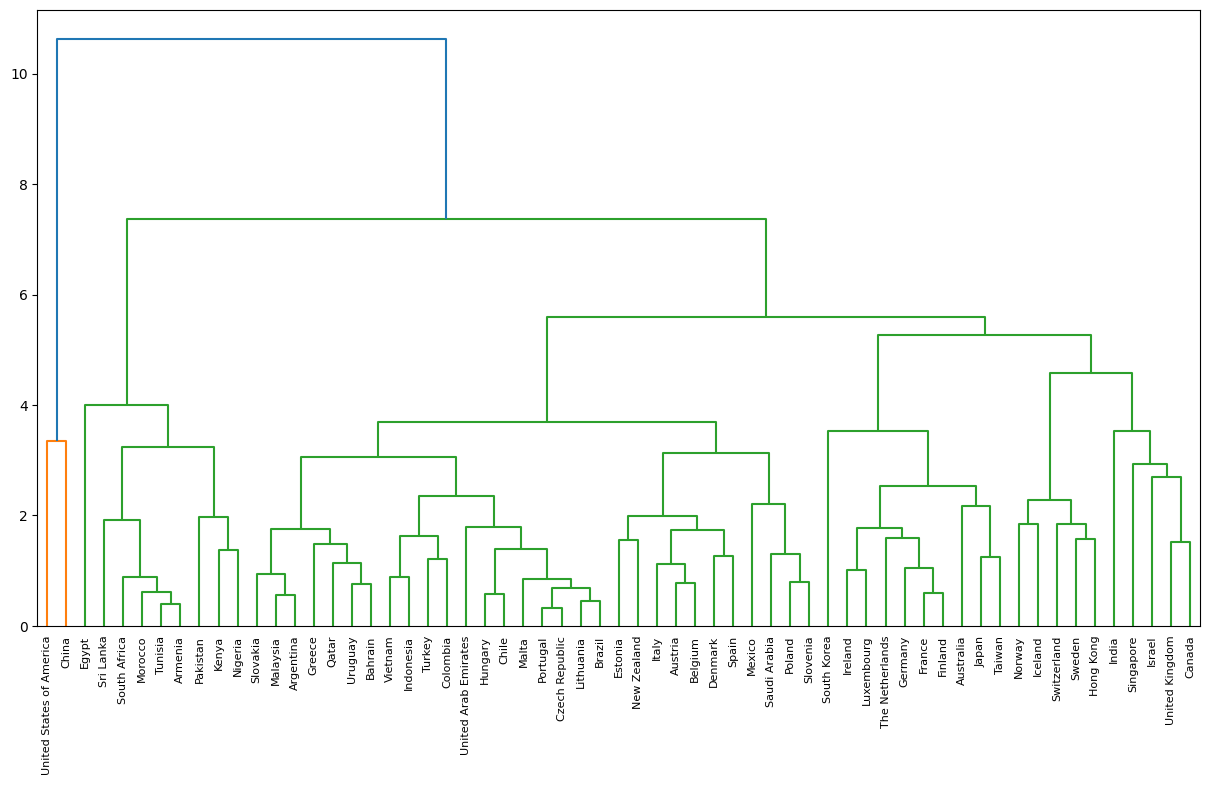

In [22]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize = (15,8), dpi = 100)

# Clustering. Let's choose the full linkage method:
mergings = linkage(samples, method='complete')

# Building a clustering diagram
dendrogram(mergings,labels=names, leaf_rotation=90, leaf_font_size=8)
plt.show()

Thus, two countries stand out immediately: the United States and China, which form a separate cluster. This shows the difference in the development of artificial intelligence in these countries compared to others. In my opinion, there should be five clusters:
1. The US and China are the most developed countries 
2. Egypt - Nigeria - the least developed countries.
3. Slovakia - Slovenia - underdeveloped countries.
4. South Korea - Taiwan - the second most developed cluster after the United States and China 
5. Norway - Canada - medium developed countries. 

This is an assumption, and we will analyse whether my thoughts were correct.  

### 3. Perform clustering using the k-means method. Select the number of clusters by the "bent elbow" method  

#### Let's use the bent elbow method to select the optimal number of clusters

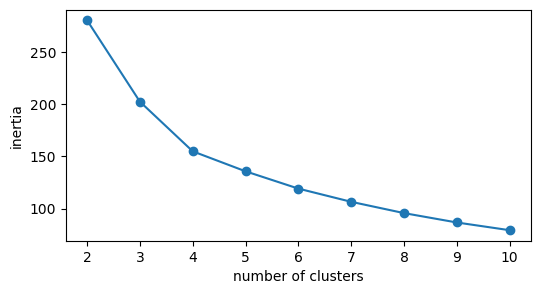

In [23]:
from sklearn.cluster import KMeans
# set the number of clusters from 2 to 10 
clusters = range(2, 11)  
inertias = []

for k in clusters:
    # clustering method - k-means
    model = KMeans(n_clusters=k)
    
    # evaluate the model
    model.fit(X_stand)
    
    # for each number of clusters, calculate the inertia, add the calculated values to the inertias list
    inertias.append(model.inertia_)
    
# plot the inertia indicator for each number of clusters
plt.figure(figsize=(6,3))
plt.plot(clusters, inertias, '-o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(clusters)
plt.show()

We see that the more optimal number of clusters is 4. We conclude that my assumptions were wrong. 

In [24]:
# Split the data into 4 clusters
kmeans = KMeans(n_clusters=4, random_state=11) 
kmeans.fit(X_stand)

# Get the corresponding clusters
labels = kmeans.predict(X_stand)
print(labels)

[0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 3 1 3 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]


In [25]:
# add the obtained cluster values to the table with the initial data
AI['Cluster'] = labels
AI.head()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Cluster
Country,,,,,,,,
United States of America,50.00,94.02,64.56,70.00,75.00,77.39,50.00,0
China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,0
United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,3
Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,3
Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,3


In [26]:
#check if the clusters are full
AI[['Cluster']].value_counts()

Cluster
1          24
3          22
2          13
0           2
dtype: int64

Thus, we conclude that the first cluster includes 2 countries. The second includes 24, the third - 13, and the fourth - 22. 

### 4. We will give a detailed economic description of the resulting clusters.

In [27]:
# calculate the cluster centres
centres = kmeans.cluster_centers_

# add the resulting cluster centres to the new_data dataframe
new_AI = pd.DataFrame(centres, columns = ['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', 'Government Strategy', 'Commercial'])
new_AI

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial
0,1.479166,1.656577,0.547692,3.553478,3.546957,1.111264,4.561930
1,-0.478927,-0.008900,0.559553,-0.491773,-0.501682,0.202695,-0.358086
2,-0.866242,-1.265348,-1.215079,-0.876156,-0.677072,-1.188559,-0.493224
3,0.899866,0.606817,0.057790,0.731165,0.624926,0.380185,0.267369


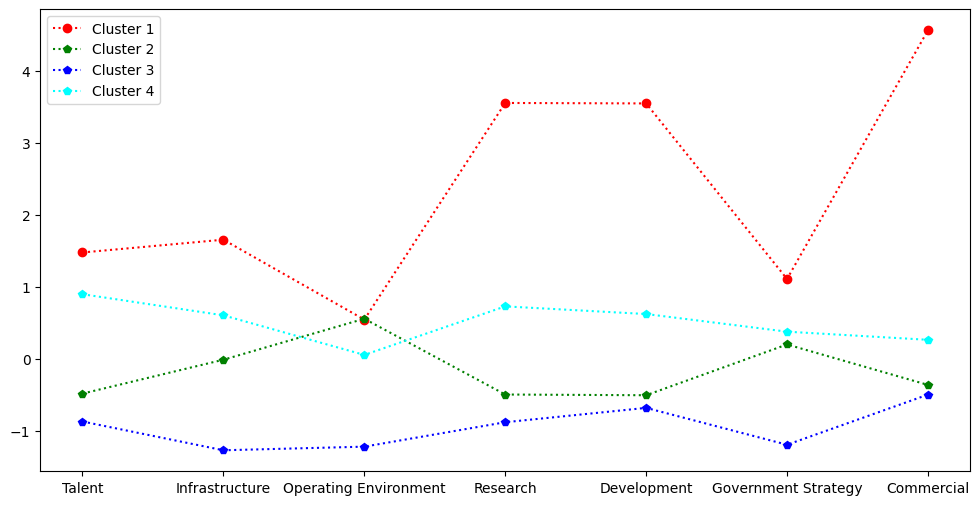

In [28]:
# visualise the resulting cluster centres
plt.figure(figsize = (12,6), dpi = 100)
plt.plot(new_AI.iloc[0, :], 'kp:', color='red', marker='o', label='Cluster 1')
plt.plot(new_AI.iloc[1, :], 'kp:', color='green', label='Cluster 2')
plt.plot(new_AI.iloc[2, :], 'kp:', color='blue', label='Cluster 3')
plt.plot(new_AI.iloc[3, :], 'kp:', color='cyan', label='Cluster 4')
plt.legend()

1. The second cluster is below average in most indicators, but has the highest level of public opinion on AI. 
2. The third cluster is the worst by all indicators.second
3. The first cluster is the best by all indicators, with the exception of public opinion, which is slightly lower than the first cluster.
4. The fourth cluster has most of the indicators above average, with a slightly lower level of public opinion about AI.

In [34]:
# Change the names of the clusters according to their interpretation:
dict = {0: 'Leading country', 
        1: 'Below average', 
        2: 'Backward',
        3: 'Above average'}
AI.replace({'Cluster': dict},inplace=True)
AI.head()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Cluster
Country,,,,,,,,
United States of America,50.00,94.02,64.56,70.00,75.00,77.39,50.00,Leading country
China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,Leading country
United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,Above average
Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,Above average
Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,Above average


In [35]:
# Let's group countries into clusters using groupby:
AI.groupby('Cluster')[['Talent', 'Infrastructure', 'Operating Environment', 'Research', 'Development', 'Government Strategy', 'Commercial', ]].mean()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial
Cluster,,,,,,,
Above average,26.518636,75.786818,68.307273,27.382273,25.464091,67.184545,7.867727
Backward,5.981538,37.936923,42.954615,2.706923,2.284615,26.531538,0.935385
Below average,10.485417,63.338750,78.301250,8.607917,5.407083,62.585000,2.167083
Leading country,33.255000,97.010000,78.065000,70.710000,77.485000,86.130000,47.010000


The analysis shows that the average values correspond to the initial interpretation: 
1. The "Above Average" cluster has the second-highest rating for most indicators, with a slightly lower level of public opinion about AI .
2. The "Backward" cluster is the worst by all indicators.
3. The "below average" cluster has the third highest score in most indicators, but has the highest level of public opinion about AI .
4. The "leading" cluster is the best by all indicators, with the exception of public opinion, which is slightly lower than the third cluster .

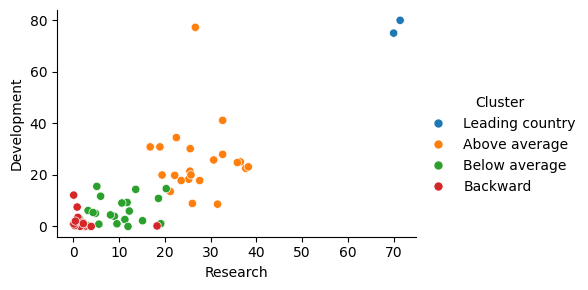

In [36]:
# Analyse how clusters differ depending on the level of Research 
sns.relplot(data = AI, x='Research', y='Development', hue='Cluster', height=3, aspect=1.5);

We can see that all clusters can be distinguished quite clearly. Backward countries have Research and Development scores of no more than 5 and 10, respectively. Below average - no more than 25 and 20, respectively. Above average no more than 40 and 40, respectively. Leading countries have about 70 and 80 respectively.

<Figure size 1000x600 with 0 Axes>

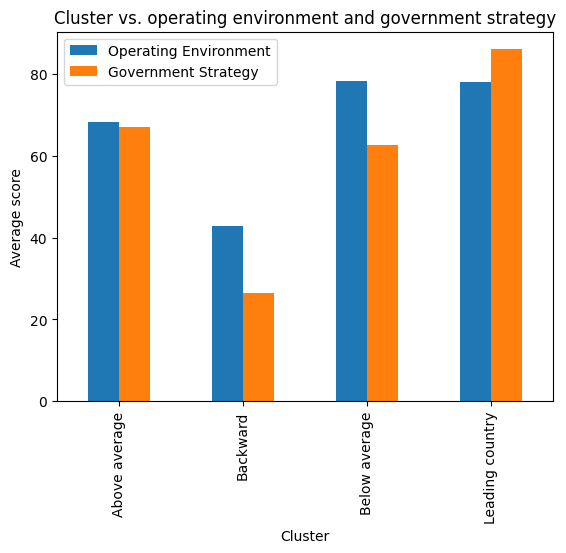

In [37]:
# Let's try to analyse the Government Strategy and Operating Environment splines by cluster
plt.figure(figsize=(10, 6))
cluster_data = AI.groupby('Cluster').mean()[['Operating Environment', 'Government Strategy']]
cluster_data.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Average score')
plt.title('Cluster vs. operating environment and government strategy')
plt.show()

We can see that the average level of "Operating Environment" in the "Below Average" cluster is indeed the highest. Therefore, we conclude that the countries in this cluster have the best attitude towards artificial intelligence, but the actual level of AI development in these countries is slightly behind.

In [39]:
# Try to find out the names of all countries in each cluster:
# Grouping data by the "Cluster" column and getting a list of countries for each cluster
clusters = AI.groupby('Cluster').apply(lambda x: x.index.tolist())

# Displaying the result
for cluster, countries in clusters.items():
    print(f"Cluster {cluster}:")
    for country in countries:
        print(country)
    print()

Cluster Above average:
United Kingdom
Canada
Israel
Singapore
South Korea
The Netherlands
Germany
France
Australia
Ireland
Finland
Denmark
Luxembourg
Japan
India
Switzerland
Sweden
Hong Kong
Austria
Taiwan
Norway
Belgium

Cluster Backward:
Iceland
Bahrain
Vietnam
Indonesia
Tunisia
South Africa
Morocco
Armenia
Sri Lanka
Egypt
Kenya
Nigeria
Pakistan

Cluster Below average:
Spain
Estonia
Saudi Arabia
Poland
Slovenia
New Zealand
Italy
Malta
United Arab Emirates
Portugal
Czech Republic
Lithuania
Brazil
Greece
Slovakia
Hungary
Malaysia
Mexico
Chile
Argentina
Qatar
Turkey
Colombia
Uruguay

Cluster Leading country:
United States of America
China

